In [103]:
import pandas as pd
import numpy as np
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/glass/glass.data'
col_names = ['id','ri','na','mg','al','si','k','ca','ba','fe','glass_type']
glass = pd.read_csv(url, names=col_names, index_col='id')
glass.sort_values('al',inplace=True)

In [104]:
training_glass = glass[:185][:]
training_glass
testing_glass = glass[185:][:]
testing_glass

,ri,na,mg,al,si,k,ca,ba,fe,glass_type
id,,,,,,,,,,
213,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.00,7
195,1.51683,14.56,0.00,1.98,73.29,0.00,8.52,1.57,0.07,7
211,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.00,7
204,1.51658,14.80,0.00,1.99,73.11,0.00,8.28,1.71,0.00,7
194,1.51719,14.75,0.00,2.00,73.02,0.00,8.53,1.59,0.08,7
212,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.00,7
189,1.52247,14.86,2.20,2.06,70.26,0.76,9.76,0.00,0.00,7
214,1.51711,14.23,0.00,2.08,73.36,0.00,8.62,1.67,0.00,7
85,1.51409,14.25,3.09,2.08,72.28,1.10,7.08,0.00,0.00,2


In [105]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10,6)

/home/iamchiragsharma/Career/Codes/jupyterNotebook/pyjpy/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


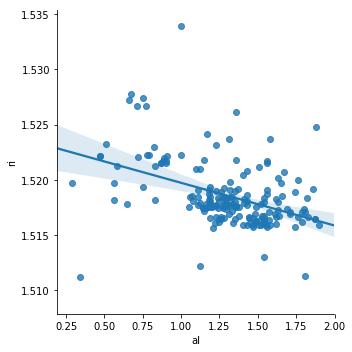

In [106]:
sns.lmplot(x='al',y='ri',data=training_glass)

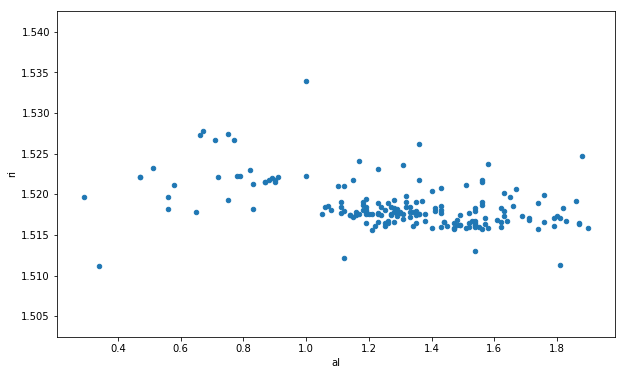

In [107]:
#same scatter plot using pandas
training_glass.plot(kind='scatter',x='al',y='ri')

Text(0, 0.5, 'ri')

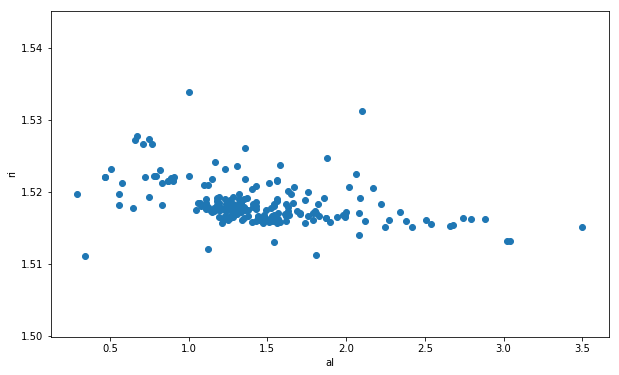

In [108]:
#same now using matplotlib
plt.scatter(glass.al,glass.ri)
plt.xlabel('al')
plt.ylabel('ri')

In [109]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
feature_col = 'al'
X = (training_glass[feature_col].values).reshape(-1,1)
Y = (training_glass['ri'].values).reshape(-1,1)
Y_test = (testing_glass['ri'].values).reshape(-1,1)
X_test = (testing_glass['al'].values).reshape(-1,1)
linreg.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

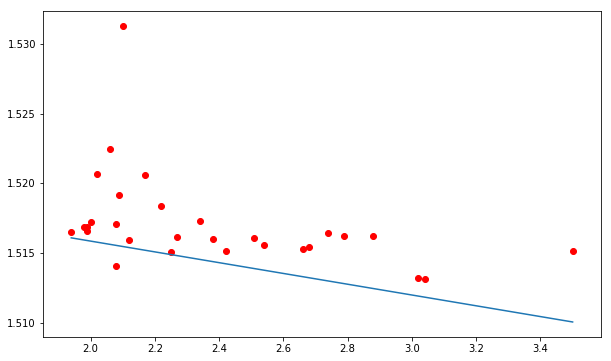

In [110]:
testing_glass['predict_ri'] = linreg.predict(X_test)
plt.plot(testing_glass.al,testing_glass.predict_ri)
plt.scatter(testing_glass.al,testing_glass.ri,color='r')

In [111]:
from sklearn.metrics import r2_score
r2_score(testing_glass.ri,testing_glass.predict_ri)

-0.4669333638694526